In [1]:
directory = 'Indian Food'
import os
classes = os.listdir(directory)
print(classes)

['Briyani', 'Chole-Bhature', 'dabeli', 'dal', 'dhokla', 'dosa', 'Frankie', 'Jalebi', 'Kofta', 'Naan', 'pakora', 'Paneer-Tikka', 'Pani-Puri', 'Pav-Bhaji', 'Vadapav']


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
directory, 
target_size=(256,256), 
color_mode='rgb', 
batch_size=32, 
class_mode='categorical', 
subset='training',
shuffle=True,
seed=42
)

validation_generator = train_datagen.flow_from_directory(
directory,
target_size=(256,256), 
color_mode='rgb', 
batch_size=32,
class_mode='categorical', 
subset='validation', 
shuffle=False
)

Found 3821 images belonging to 15 classes.
Found 949 images belonging to 15 classes.


In [3]:
class_names = list(train_generator.class_indices.keys())
class_labels = train_generator.class_indices

print("Class names:", class_names)
print("Class labels:", class_labels)

Class names: ['Briyani', 'Chole-Bhature', 'Frankie', 'Jalebi', 'Kofta', 'Naan', 'Paneer-Tikka', 'Pani-Puri', 'Pav-Bhaji', 'Vadapav', 'dabeli', 'dal', 'dhokla', 'dosa', 'pakora']
Class labels: {'Briyani': 0, 'Chole-Bhature': 1, 'Frankie': 2, 'Jalebi': 3, 'Kofta': 4, 'Naan': 5, 'Paneer-Tikka': 6, 'Pani-Puri': 7, 'Pav-Bhaji': 8, 'Vadapav': 9, 'dabeli': 10, 'dal': 11, 'dhokla': 12, 'dosa': 13, 'pakora': 14}


In [4]:
X_train, y_train = [], []
for _ in range(119):
    X_batch, y_batch = next(train_generator)
    X_train.extend(X_batch)
    y_train.extend(y_batch)


X_val, y_val = [], []
for _ in range(29):  # num_samples is the number of samples you want to collect
    X_batch, y_batch = next(validation_generator)
    X_val.extend(X_batch)
    y_val.extend(y_batch)

c:\Python311\Lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [5]:
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [6]:
print('Shape of X_train is ', X_train.shape)
print('Shape of y_train is ', y_train.shape)
print('Shape of X_val is ', X_val.shape)
print('Shape of y_val is ', y_val.shape)

Shape of X_train is  (3808, 256, 256, 3)
Shape of y_train is  (3808, 15)
Shape of X_val is  (928, 256, 256, 3)
Shape of y_val is  (928, 15)


In [7]:
nsamples, nx, ny, nrgb = X_train.shape
X_train2 = X_train.reshape((nsamples,nx*ny*nrgb))
print('Shape of X_train2 is ', X_train2.shape)

nsamples_v, nx_v, ny_v, nrgb_v = X_val.shape
X_val2 = X_val.reshape((nsamples_v, nx_v*ny_v*nrgb_v))
print('Shape of X_val2 is ', X_val2.shape)

Shape of X_train2 is  (3808, 196608)
Shape of X_val2 is  (928, 196608)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train2, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [20]:
# Make predictions on the test set
y_pred = rf_model.predict(X_val2)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.25


In [21]:
# Print classification report
print(classification_report(y_val, y_pred, target_names=class_names))

               precision    recall  f1-score   support

      Briyani       0.00      0.00      0.00        45
Chole-Bhature       1.00      0.02      0.03        65
      Frankie       1.00      0.01      0.03        68
       Jalebi       1.00      0.10      0.18        61
        Kofta       1.00      0.87      0.93       133
         Naan       1.00      0.03      0.06        70
 Paneer-Tikka       1.00      0.04      0.08        51
    Pani-Puri       0.00      0.00      0.00        35
    Pav-Bhaji       0.00      0.00      0.00        60
      Vadapav       1.00      0.95      0.98       107
       dabeli       0.00      0.00      0.00        44
          dal       0.00      0.00      0.00        52
       dhokla       0.00      0.00      0.00        49
         dosa       0.00      0.00      0.00        34
       pakora       0.00      0.00      0.00        54

    micro avg       1.00      0.25      0.40       928
    macro avg       0.47      0.13      0.15       928
 weighte

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
y_out = []
for _ in range(len(y_val)):
    result = np.zeros_like(y_val[0])
    result[np.argmax(y_pred[_])] = 1
    y_out.append(result)

y_out = np.array(y_out)

In [17]:
from sklearn.metrics import confusion_matrix
y_val1 = []
y_out1 = []
for _ in range(len(y_val)):
    y_val1.append(np.argmax(y_val[_]))
    y_out1.append(np.argmax(y_out[_]))
cf = confusion_matrix(y_val1, y_out1)

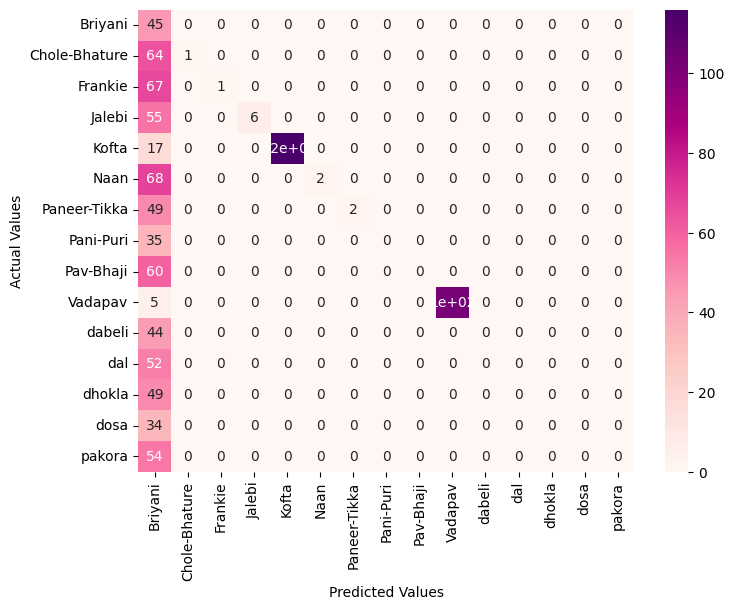

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cm_df = pd.DataFrame(cf, index = class_names, columns = class_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot = True, cmap = 'RdPu')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()